# Comparison of Root Node Selection

In [1]:
from mmot import MMOTSolver

import numpy as np 
import matplotlib.pyplot as plt 

In [23]:
# Grid of size n1 x n2
n1 = 128   # x axis
n2 = 128   # y axis

x, y = np.meshgrid(np.linspace(0.5/n1,1-0.5/n1,n1), np.linspace(0.5/n2,1-0.5/n1,n2))

r = 0.125

positions = np.array([[0.2,0.8],
                      [0.4,0.6],
                      [0.6,0.4],
                      [0.8,0.2]])

# measures = [None]*len(positions)
measures = [None]*(len(positions))

for i in range(len(positions)):
    xc,yc = positions[i]
    measures[i] = np.zeros((n2, n1))
    measures[i][(x-xc)**2 + (y-yc)**2 < r**2] = 1

    # Normalize
    measures[i] *= n1*n2 / np.sum(measures[i])


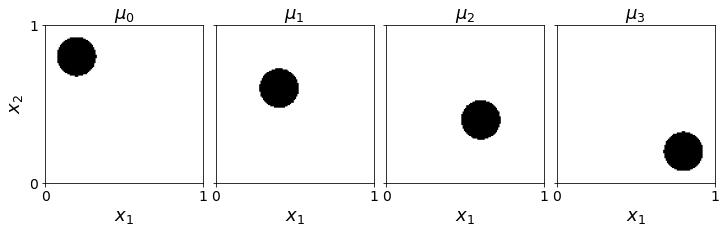

In [84]:

fig, ax = plt.subplots(1, len(measures), figsize=(12,6),sharey=True)
for i in range(len(measures)):
    ax[i].imshow(measures[i], origin='lower', extent=(0,1,0,1), cmap='Greys')
    ax[i].set_title("$\\mu_{{ {:0d} }}$".format(i),fontsize=18)
    ax[i].set_xlabel('$x_1$',fontsize=18)
    ax[i].set_xticks([0,1])
    ax[i].set_yticks([0,1])

    ax[i].tick_params(axis='x',labelsize=14)
    ax[i].tick_params(axis='y',labelsize=14)

ax[0].set_ylabel('$x_2$',fontsize=18)
plt.subplots_adjust(wspace=0.08)

plt.savefig('CycleMeasures.pdf',bbox_inches='tight')

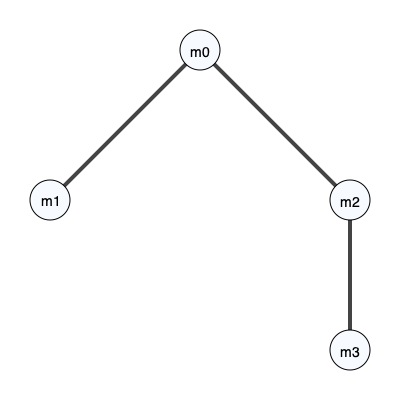

In [77]:
unroll_node = 0

edge_list = [[0,1],
             [0,2],
             [2,3]]


prob = MMOTSolver(measures, edge_list, x, y, unroll_node)

prob.Visualize('original', filename='CycleCostGraph.svg')

In [29]:
root_node_options = [[i] for i in range(len(measures))] + ['all']
results = []
for root_nodes in root_node_options:
    results.append( prob.Solve(max_its=500, step_size=1.0, ftol_abs=1e-6, gtol_abs=1e-5, root_nodes=root_nodes) )

Iteration, StepSize,        Cost,        Error,  Line Its
        0,   1.0000,  9.3533e-02,   1.6487e+00,         0
       10,   0.1780,  1.9005e-01,   1.0564e-01,         0
       20,   0.0713,  2.0183e-01,   1.1325e-02,         0
       30,   0.1712,  2.0945e-01,   6.9591e-03,         0
       40,   0.2057,  2.1399e-01,   4.8523e-03,         0
       50,   0.0206,  2.1739e-01,   2.3924e-02,         4
       60,   0.0124,  2.2015e-01,   1.0205e-02,         0
       70,   0.0297,  2.2208e-01,   3.2234e-03,         0
       80,   0.0179,  2.2380e-01,   4.6583e-03,         0
       90,   0.0429,  2.2504e-01,   1.4997e-03,         0
      100,   0.0258,  2.2629e-01,   1.1306e-03,         0
      110,   0.0155,  2.2723e-01,   1.1647e-03,         0
      120,   0.0186,  2.2801e-01,   1.8135e-03,         0
      130,   0.0112,  2.2882e-01,   1.0543e-03,         0
      140,   0.0067,  2.2943e-01,   9.9812e-03,         6
      150,   0.3869,  2.2994e-01,   4.3245e-04,         0
      160,   0

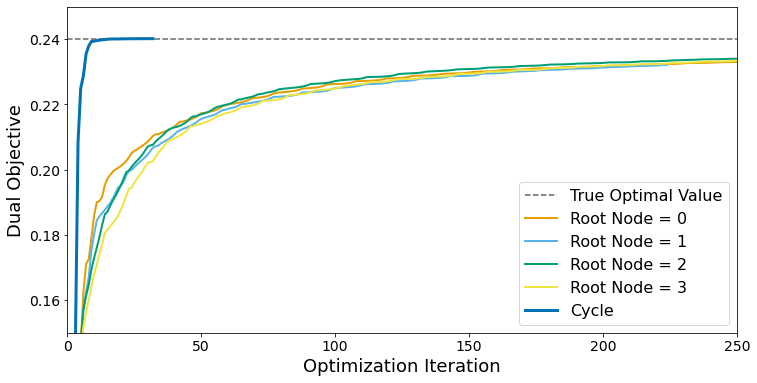

In [85]:
plt.figure(figsize=(12,6))
colors = ['#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7'] # colorblind safe, from https://davidmathlogic.com/colorblind

true_val = 3*(0.2**2 + 0.2**2)
plt.plot([0,300],[true_val,true_val], '--k', alpha=0.6,label='True Optimal Value')

for i,res in enumerate(results):
    if(root_node_options[i]!='all'):
        plt.plot(res.costs,label='Root Node = {}'.format(root_node_options[i][0]), c=colors[i], linewidth=2)
    else:
        plt.plot(res.costs,label='Cycle',linewidth=3, c=colors[i])

plt.plot([10,10],[0,1],'--k')
plt.xlim(0,250)
plt.ylim([0.15,0.25])
plt.ylabel('Dual Objective',fontsize=18)
plt.xlabel('Optimization Iteration',fontsize=18)
plt.legend(fontsize=16) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('CyclePerformance.pdf',bbox_inches='tight')
plt.show()